In [7]:
#Importing Data
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error

data = pd.read_csv('brain-features.csv', delimiter = ',', skiprows = 1)

X = data.iloc[:,1:138]
y = data.iloc[:,139:140]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=4)


In [8]:
#Bayesian Ridge Regression Model
from sklearn import linear_model

reg = linear_model.BayesianRidge()
reg.fit(X_train, np.ravel(y_train))
y_pred1 = reg.predict(X_test)
print("R Squared:",metrics.r2_score(y_test, y_pred1))
print("RMSE:", mean_squared_error(y_test, y_pred1,squared=False))

R Squared: 0.7807034459353107
RMSE: 9.372715253317514


In [9]:
#Lasso Model
from sklearn import linear_model

reg2 = linear_model.Lasso(alpha=400,max_iter=40000)
reg2.fit(X_train, np.ravel(y_train))
y_pred2 = reg2.predict(X_test)
print("R Squared:",metrics.r2_score(y_test, y_pred2))
print("RMSE:", mean_squared_error(y_test, y_pred2,squared=False))

R Squared: 0.7808909036683513
RMSE: 9.368708433428585


In [10]:
#MLP Regression
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

reg3 = make_pipeline(StandardScaler(), MLPRegressor(activation='logistic', learning_rate_init=0.001, max_iter=4444))
reg3.fit(X_train, np.ravel(y_train))
y_pred3 = reg3.predict(X_test)
print("R Squared:",metrics.r2_score(y_test, y_pred3))
print("RMSE:", mean_squared_error(y_test, y_pred3,squared=False))

R Squared: 0.8628366751446764
RMSE: 7.412565115702595


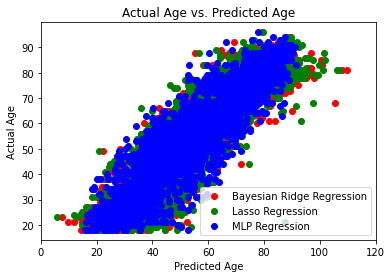

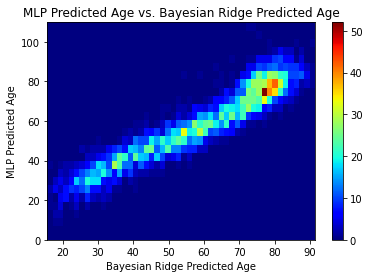

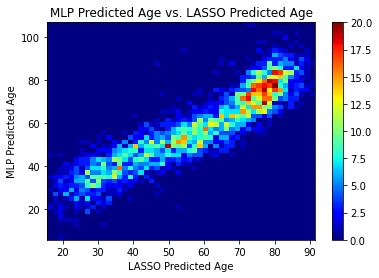

In [15]:
import matplotlib.pyplot as plt
plt.figure(1)
plt.title('Actual Age vs. Predicted Age')
plt.xlabel('Predicted Age')
plt.ylabel('Actual Age')
plt.scatter(y_pred1, y_test, label = 'Bayesian Ridge Regression', color = 'red')
plt.scatter(y_pred2, y_test, label = 'Lasso Regression', color = 'green')
plt.scatter(y_pred3, y_test, label = 'MLP Regression', color = 'blue')
plt.xlim(left=0)
plt.legend(loc = 'lower right')

plt.figure(2)
plt.title('MLP Predicted Age vs. Bayesian Ridge Predicted Age')
plt.hist2d(y_pred3, y_pred1, (50, 50), cmap=plt.cm.jet)
plt.ylim(bottom=0)
plt.xlabel('Bayesian Ridge Predicted Age')
plt.ylabel('MLP Predicted Age')
plt.colorbar()

plt.figure(3)
plt.title('MLP Predicted Age vs. LASSO Predicted Age')
plt.hist2d(y_pred3, y_pred2, (50, 50), cmap=plt.cm.jet)
plt.xlabel('LASSO Predicted Age')
plt.ylabel('MLP Predicted Age')
plt.colorbar()